In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
extra_df = df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

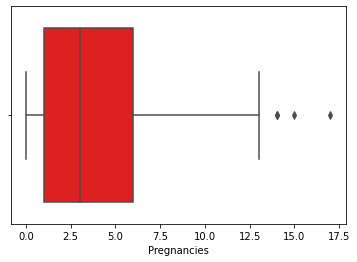

In [ ]:
sns.boxplot(x= 'Pregnancies',data = df,color='red')

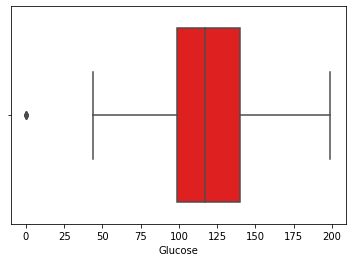

In [ ]:
sns.boxplot(x= 'Glucose',data = df,color='red')

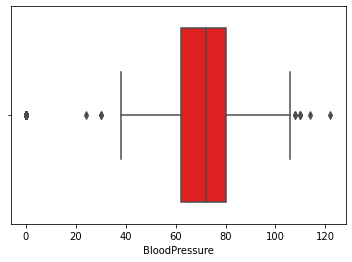

In [ ]:
sns.boxplot(x= 'BloodPressure',data = df,color='red')

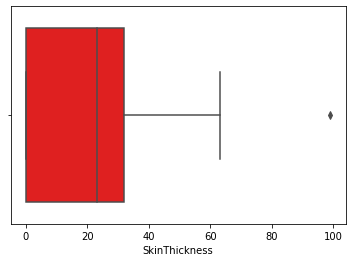

In [ ]:
sns.boxplot(x= 'SkinThickness',data = df,color='red')

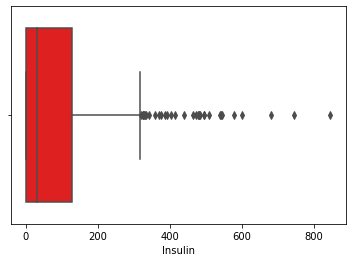

In [ ]:
sns.boxplot(x= 'Insulin',data = df,color='red')

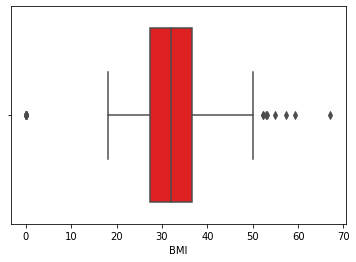

In [ ]:
sns.boxplot(x= 'BMI',data = df,color='red')

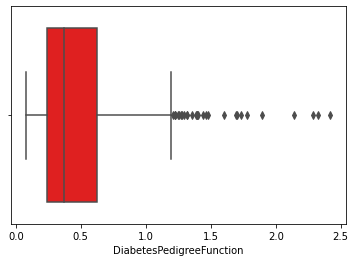

In [ ]:
sns.boxplot(x= 'DiabetesPedigreeFunction',data = df,color='red')

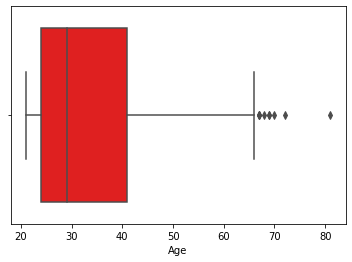

In [ ]:
sns.boxplot(x= 'Age',data = df,color='red')

In [ ]:
print("No. of Non-Diabeted patient: ",df[df['Outcome']==0]['Outcome'].count())
print("No. of Diabetes patient: ",df[df['Outcome']==1]['Outcome'].count())

No. of Non-Diabeted patient:  500
No. of Diabetes patient:  268


In [ ]:
Non_diabetes = df[df['Outcome']==0]['Outcome'].count()
Diabetes = df[df['Outcome']==1]['Outcome'].count()
Diabetes_percent = Diabetes/(Diabetes+Non_diabetes)
Non_diabetes_percent = Non_diabetes/(Diabetes+Non_diabetes)
print('Total Number of Non-Diabetes Patients:',Non_diabetes)
print('Total Number of Diabetes Patients:',Diabetes)
print('Percentage of Non-Diabetes Patients :',Non_diabetes_percent*100,'%')
print('Percentage of Diabetes Patients :',Diabetes_percent*100,'%')

Total Number of Non-Diabetes Patients: 500
Total Number of Diabetes Patients: 268
Percentage of Non-Diabetes Patients : 65.10416666666666 %
Percentage of Diabetes Patients : 34.89583333333333 %


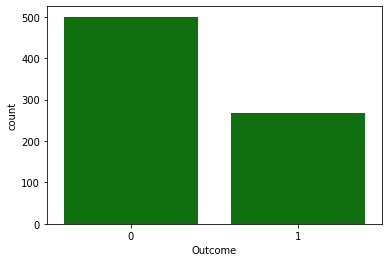

In [ ]:
sns.countplot(x= 'Outcome',data = df,color='green')

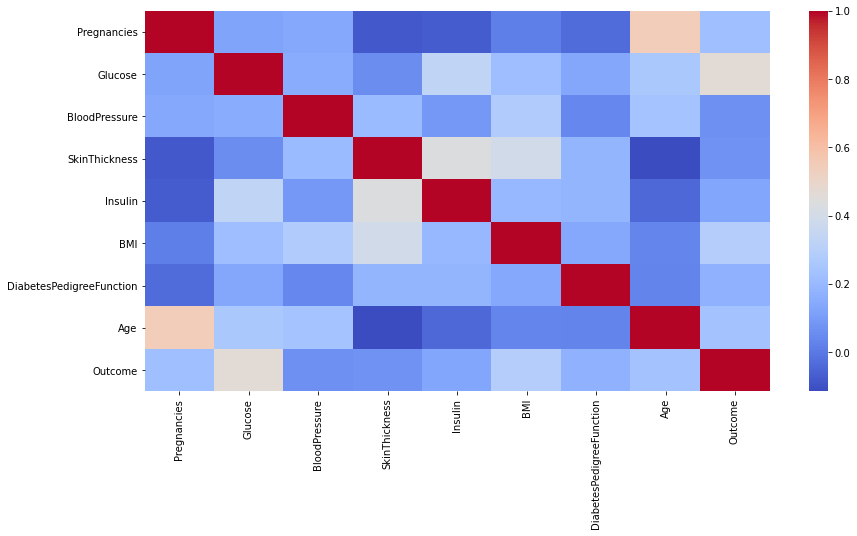

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),cmap='coolwarm')

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

AdaBoost and Random Forest Classifier are implemented in original dataset as baseline models, without outlier detection and resampling. 

# **Random Forest Classifier in Original Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,train_size = 0.7)

Confusion matrix:
 [[137  20]
 [ 34  40]]


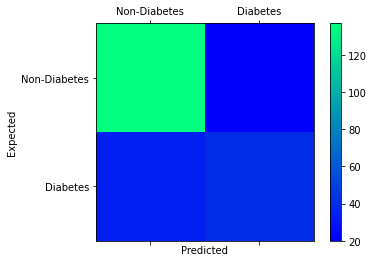

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,accuracy_score

rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       157
           1       0.67      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



# **AdaBoost Classifier in Original Dataset**

Confusion matrix:
 [[135  22]
 [ 35  39]]


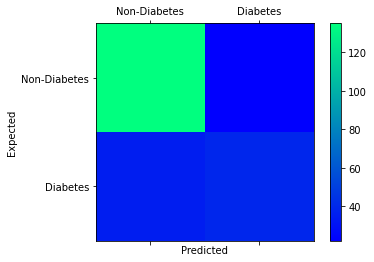

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adabc = AdaBoostClassifier(random_state = 1)
adabc.fit(X_train,y_train)
prediction = adabc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.64      0.53      0.58        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231



Now, we implement 4 models mentioned in the paper for each version of the dataset.

Algorithms : Decision Tree (C4.5), Naive Bayes, SVM-RBF and RIPPER.

Dataset version : Original, SMOTEd, IQR + SMOTEd

# **Original Dataset**

# 1. Decision Tree

Confusion matrix:
 [[123  34]
 [ 25  49]]


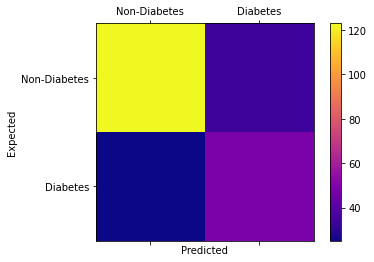

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 23)
dtc.fit(X_train,y_train)
prediction = dtc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       157
           1       0.59      0.66      0.62        74

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



# 2. Gaussian Naive Bayes

Confusion matrix:
 [[138  19]
 [ 36  38]]


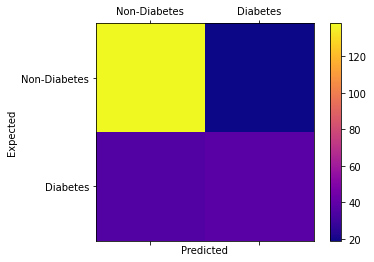

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction = gnb.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



# 3. SVM with RBF Kernel

Confusion matrix:
 [[142  15]
 [ 42  32]]


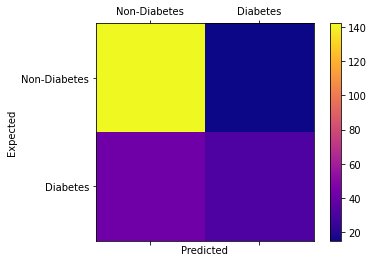

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
                                # Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.
svc=SVC(random_state=10)
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#scores = cross_val_score(svc, X, y, cv=10,scoring='f1_macro')
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.68      0.43      0.53        74

    accuracy                           0.75       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231



# 4. RIPPER

In [ ]:
pip install wittgenstein         #----- Uncomment this cell to install this library.

     |████████████████████████████████| 81kB 3.7MB/s 


Confusion matrix:
 [[144  13]
 [ 57  17]]


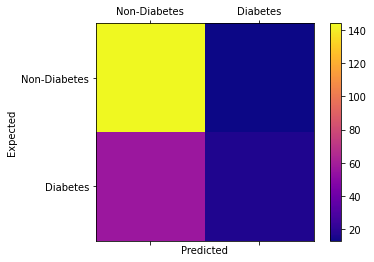

In [ ]:
import wittgenstein as lw

ripper_clf = lw.RIPPER(random_state = 0)
ripper_clf.fit(X_train,y_train)
prediction = ripper_clf.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80       157
           1       0.57      0.23      0.33        74

    accuracy                           0.70       231
   macro avg       0.64      0.57      0.57       231
weighted avg       0.67      0.70      0.65       231



# **SMOTEd Dataset**

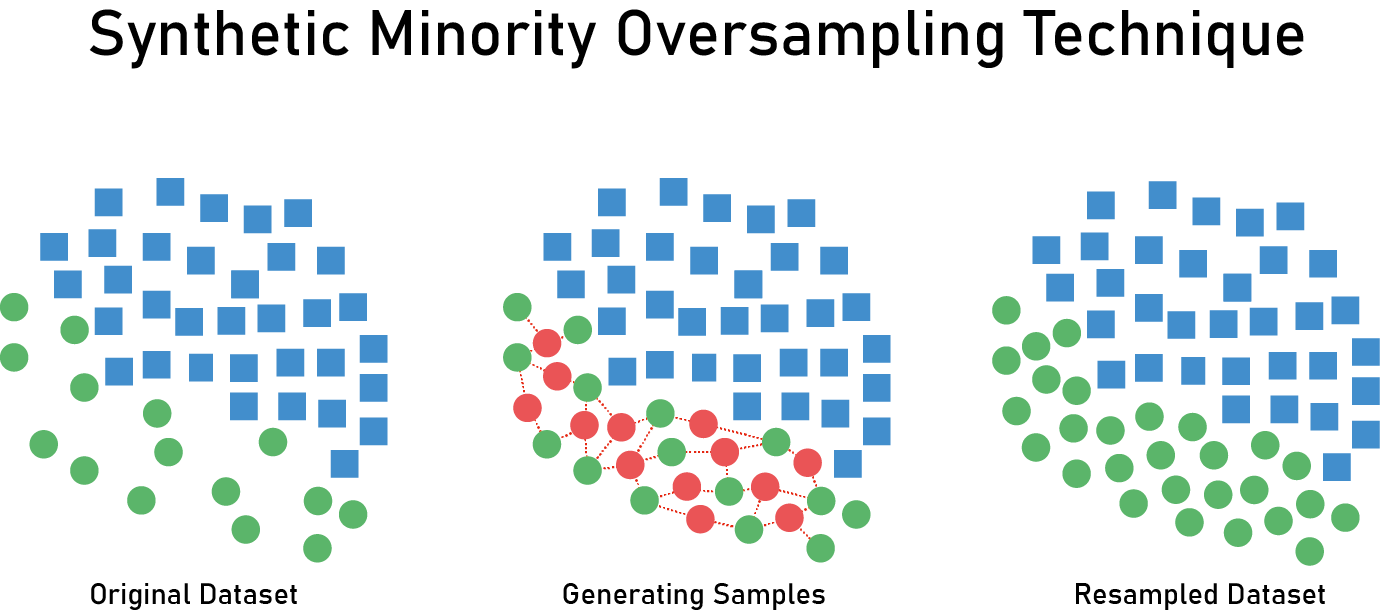

In [ ]:
from imblearn.over_sampling import SMOTE

r_smote = SMOTE(random_state = 0)
r_smote.fit(X,y)
X_smote,y_smote = r_smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Xsmote_train,Xsmote_test,ysmote_train,ysmote_test = train_test_split(X_smote,y_smote,random_state = 0,train_size = 0.7)

# 1. Decision Tree

Confusion matrix:
 [[123  33]
 [ 26 118]]


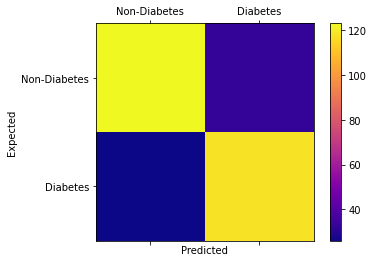

In [ ]:
dtc = DecisionTreeClassifier(random_state = 23)
dtc.fit(Xsmote_train,ysmote_train)
prediction = dtc.predict(Xsmote_test)

conf_mat = confusion_matrix(y_true=ysmote_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(ysmote_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       156
           1       0.78      0.82      0.80       144

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



# 2. Gaussian Naive Bayes

Confusion matrix:
 [[125  31]
 [ 42 102]]


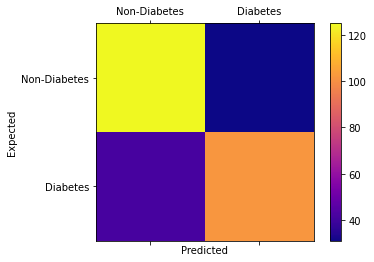

In [ ]:
gnb = GaussianNB()
gnb.fit(Xsmote_train,ysmote_train)
prediction = gnb.predict(Xsmote_test)

conf_mat = confusion_matrix(y_true=ysmote_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(ysmote_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       156
           1       0.77      0.71      0.74       144

    accuracy                           0.76       300
   macro avg       0.76      0.75      0.76       300
weighted avg       0.76      0.76      0.76       300



# 3. SVM with RBF Kernel

Confusion matrix:
 [[116  40]
 [ 33 111]]


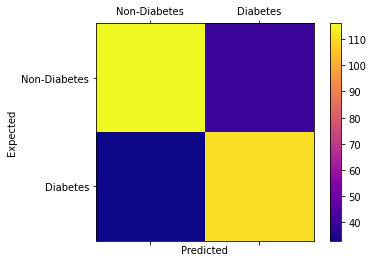

In [ ]:
svc=SVC(random_state=10)
svc.fit(Xsmote_train,ysmote_train)
prediction = svc.predict(Xsmote_test)

conf_mat = confusion_matrix(y_true=ysmote_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(ysmote_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       156
           1       0.74      0.77      0.75       144

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



# 4. RIPPER

Confusion matrix:
 [[143  13]
 [ 73  71]]


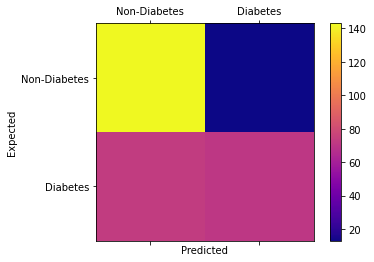

In [ ]:
ripper_clf = lw.RIPPER(random_state = 0)
ripper_clf.fit(Xsmote_train,ysmote_train)
prediction = ripper_clf.predict(Xsmote_test)

conf_mat = confusion_matrix(y_true=ysmote_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(ysmote_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       156
           1       0.85      0.49      0.62       144

    accuracy                           0.71       300
   macro avg       0.75      0.70      0.70       300
weighted avg       0.75      0.71      0.70       300



# **IQR + SMOTEd Dataset**

First identify the outliers in the dataset with IQR.

In [ ]:
Q1 = np.percentile(df,25)
Q1

0.46224999999999994

In [ ]:
Q3 = np.percentile(df,75)
Q3

61.0

In [ ]:
IQR = Q3 - Q1
IQR

60.53775

In [ ]:
new_data = (df < (Q1 - 1.5*IQR))|(df > (Q3+1.5*IQR))
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,True,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df)

In [ ]:
mask = yhat != -1
df = df[mask]

In [ ]:
new_data_1 = (df < (Q1 - 1.5*IQR))|(df > (Q3+1.5*IQR))
new_data_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
762,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
for i in range(18):
  iso = IsolationForest(contamination=0.1)
  yhat = iso.fit_predict(df)

  mask = yhat != -1
  df = df[mask]

  new_data_final = (df < (Q1 - 1.5*IQR))|(df > (Q3+1.5*IQR))

new_data_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False
47,False,False,False,False,False,False,False,False,False
50,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
729,False,False,False,False,False,False,False,False,False
742,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False
760,False,False,False,False,False,False,False,False,False


In [ ]:
diff_df = extra_df.merge(df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

In [ ]:
diff_df = diff_df.drop(['_merge'], axis=1)
diff_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


new_data_final is the data without outliers and diff_data consists of only outliers.

In [ ]:
X_outliers = diff_df.drop('Outcome',axis=1)
y_outliers = diff_df['Outcome']

In [ ]:
outlier_smote = SMOTE(random_state = 0)
outlier_smote.fit(X_outliers,y_outliers)
X_outlier_smote,y_outlier_smote = outlier_smote.fit_resample(X_outliers,y_outliers)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#X_outlier_smote.tolist()

In [ ]:
#y_outlier_smote.tolist()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
27,1,97,66,15,140,23.2,0.487,22,0
32,3,88,58,11,54,24.8,0.267,22,0
47,2,71,70,27,0,28.0,0.586,22,0
50,1,103,80,11,82,19.4,0.491,22,0


In [ ]:
X_outlier_df = pd.DataFrame(columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],data = X_outlier_smote)
y_outlier_df = pd.DataFrame(columns=['Outcome'],data = y_outlier_smote)

In [ ]:
Outlier_df = pd.concat([X_outlier_df,y_outlier_df],axis=1)
Outlier_df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0


Outlier_df contains all the outliers SMOTED. This dataframe should be merged with dataframe without outliers.

In [ ]:
IQR_SMOTE_df = pd.concat([Outlier_df,new_data_final])
IQR_SMOTE_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0


In [ ]:
X_iqr_smote = IQR_SMOTE_df.drop('Outcome',axis=1)
y_iqr_smote = IQR_SMOTE_df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_iqr_smote,y_iqr_smote,random_state = 0,train_size = 0.7)

# 1. Decision Tree

Confusion matrix:
 [[121  33]
 [ 35  81]]


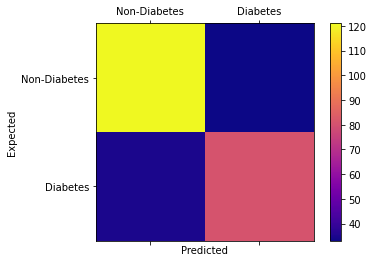

In [ ]:
dtc = DecisionTreeClassifier(random_state = 33)
dtc.fit(X_train,y_train)
prediction = dtc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       154
           1       0.71      0.70      0.70       116

    accuracy                           0.75       270
   macro avg       0.74      0.74      0.74       270
weighted avg       0.75      0.75      0.75       270



# 2. Gaussian Naive Bayes

Confusion matrix:
 [[ 90  64]
 [ 10 106]]


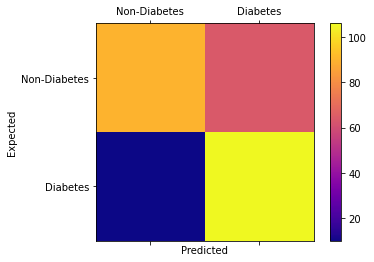

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction = gnb.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.58      0.71       154
           1       0.62      0.91      0.74       116

    accuracy                           0.73       270
   macro avg       0.76      0.75      0.72       270
weighted avg       0.78      0.73      0.72       270



# 3. SVM with RBF Kernel

Confusion matrix:
 [[136  18]
 [ 46  70]]


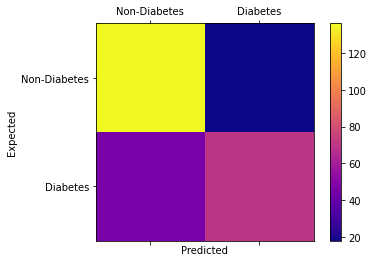

In [ ]:
svc=SVC(random_state=20)
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       154
           1       0.80      0.60      0.69       116

    accuracy                           0.76       270
   macro avg       0.77      0.74      0.75       270
weighted avg       0.77      0.76      0.76       270



# 4. RIPPER

Confusion matrix:
 [[143  11]
 [ 62  54]]


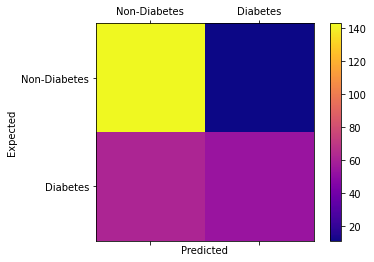

In [ ]:
ripper_clf = lw.RIPPER(random_state = 0)
ripper_clf.fit(X_train,y_train)
prediction = ripper_clf.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Diabetes', 'Diabetes']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.plasma)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       154
           1       0.83      0.47      0.60       116

    accuracy                           0.73       270
   macro avg       0.76      0.70      0.70       270
weighted avg       0.75      0.73      0.71       270

